### Importing Library to read and perform Operation on the Dataset

In [1]:
import pandas as pd
import numpy as np

`- Reading 5000000 rows of the dataset `

In [2]:
df = pd.read_csv("D://DataSets//US_Accidents_March23.csv", nrows = 5000000)

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df.shape

(5000000, 46)

In [6]:
df.duplicated().sum()

0

#### Missing Values


In [7]:
(df.isna().sum() / len(df)) * 100

ID                        0.00000
Source                    0.00000
Severity                  0.00000
Start_Time                0.00000
End_Time                  0.00000
Start_Lat                 0.00000
Start_Lng                 0.00000
End_Lat                  68.05524
End_Lng                  68.05524
Distance(mi)              0.00000
Description               0.00010
Street                    0.13186
City                      0.00272
County                    0.00000
State                     0.00000
Zipcode                   0.01688
Country                   0.00000
Timezone                  0.08600
Airport_Code              0.25104
Weather_Timestamp         1.34884
Temperature(F)            1.88228
Wind_Chill(F)            34.15814
Humidity(%)               2.00596
Pressure(in)              1.61346
Visibility(mi)            2.11220
Wind_Direction            1.93016
Wind_Speed(mph)           8.84290
Precipitation(in)        36.80616
Weather_Condition         2.05366
Amenity       

`- Droping the columns which has more than 25% missing values and have less logical relation with Severity(Target)`

In [8]:
NA_columns= ['End_Lat', 'End_Lng', 'Wind_Chill(F)']
df.drop(NA_columns, axis = 1, inplace = True)

In [9]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    5
Street                      6593
City                         136
County                         0
State                          0
Zipcode                      844
Country                        0
Timezone                    4300
Airport_Code               12552
Weather_Timestamp          67442
Temperature(F)             94114
Humidity(%)               100298
Pressure(in)               80673
Visibility(mi)            105610
Wind_Direction             96508
Wind_Speed(mph)           442145
Precipitation(in)        1840308
Weather_Condition         102683
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction  

`-Dealing with NAN values`

In [10]:
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        df[col].fillna(df[col].mean(), inplace=True)
        

C:\Users\anshu\AppData\Local\Temp\ipykernel_11780\2100700615.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [11]:
df.isna().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   5
Street                     6593
City                        136
County                        0
State                         0
Zipcode                     844
Country                       0
Timezone                   4300
Airport_Code              12552
Weather_Timestamp         67442
Temperature(F)                0
Humidity(%)                   0
Pressure(in)                  0
Visibility(mi)                0
Wind_Direction            96508
Wind_Speed(mph)               0
Precipitation(in)             0
Weather_Condition        102683
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit 

### Uneccessary Columns

In [12]:
{col : len(df[col].unique()) for col in df.columns if df[col].dtype == 'object'}

{'ID': 5000000,
 'Source': 3,
 'Start_Time': 4430663,
 'End_Time': 4621102,
 'Description': 2879655,
 'Street': 271783,
 'City': 12876,
 'County': 1824,
 'State': 49,
 'Zipcode': 628030,
 'Country': 1,
 'Timezone': 5,
 'Airport_Code': 2024,
 'Weather_Timestamp': 792954,
 'Wind_Direction': 25,
 'Weather_Condition': 140,
 'Sunrise_Sunset': 3,
 'Civil_Twilight': 3,
 'Nautical_Twilight': 3,
 'Astronomical_Twilight': 3}

In [13]:
columns = ['ID', 'Description', 'Street', 'Zipcode', 'Country', 'Civil_Twilight']

df.drop(columns, axis = 1, inplace = True)

In [14]:
df.shape

(5000000, 37)

In [15]:
for col in df.columns:
    if df[col].dtype == 'O':
        df[col].fillna(df[col].mode(), inplace=True)
        

C:\Users\anshu\AppData\Local\Temp\ipykernel_11780\1812580068.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode(), inplace=True)


In [16]:
df.isna().sum()

Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
City                        136
County                        0
State                         0
Timezone                   4300
Airport_Code              12552
Weather_Timestamp         67442
Temperature(F)                0
Humidity(%)                   0
Pressure(in)                  0
Visibility(mi)                0
Wind_Direction            96508
Wind_Speed(mph)               0
Precipitation(in)             0
Weather_Condition        102683
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_

`-Separating the date and year for easy understanding`

In [17]:
def get_year(df, column):
    return df[column].apply(lambda date : date[0:4] if not pd.isna(date) else None)

def get_month(df, column):
    return df[column].apply(lambda date : date[5:7] if not pd.isna(date) else None)

In [18]:
df['Start_Time_Year'] = get_year(df, 'Start_Time').astype('int')
df['Start_Time_Month'] = get_month(df, 'Start_Time').astype('int')

df['End_Time_Year'] = get_year(df, 'End_Time').astype('int')
df['End_Time_Month'] = get_month(df, 'End_Time').astype('int')

df['Weather_Timestamp_Year'] = get_year(df, 'Weather_Timestamp').fillna(0).astype('int')
df['Weather_Timestamp_Month'] = get_month(df, 'Weather_Timestamp').fillna(0).astype('int')




In [19]:
df.drop(columns = ['Start_Time', 'End_Time', 'Weather_Timestamp'], axis = 1, inplace = True)

In [20]:
# def OnehotEncoding(df, columns, prefixes):
#     data = df.copy()
#     for col, prefix in zip(columns, prefixes):
#         dummy = pd.get_dummies(data[col], prefix = prefix)
#         data = pd.concat([data, dummy], axis = 1)
#         data = data.drop(col, axis = 1)
    
#     return data

In [21]:
# {col : len(df[col].unique()) for col in df.columns if df[col].dtype == 'object'}

In [22]:
df.dropna(subset = ['Sunrise_Sunset', 'Nautical_Twilight', 'Astronomical_Twilight'], inplace = True)

In [23]:
# df = OnehotEncoding(
#     df,
#     columns = ['State', 'Timezone', 'Wind_Direction', 'Weather_Condition'],
#     prefixes = ['ST', 'TZ', 'WD', 'WC']
# )

In [113]:
df

,Source,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Timezone,Airport_Code,...,Turning_Loop,Sunrise_Sunset,Nautical_Twilight,Astronomical_Twilight,Start_Time_Year,Start_Time_Month,End_Time_Year,End_Time_Month,Weather_Timestamp_Year,Weather_Timestamp_Month
0,Source2,3,39.865147,-84.058723,0.010,Dayton,Montgomery,OH,US/Eastern,KFFO,...,False,Night,Night,Night,2016,2,2016,2,2016,2
1,Source2,2,39.928059,-82.831184,0.010,Reynoldsburg,Franklin,OH,US/Eastern,KCMH,...,False,Night,Night,Day,2016,2,2016,2,2016,2
2,Source2,2,39.063148,-84.032608,0.010,Williamsburg,Clermont,OH,US/Eastern,KI69,...,False,Night,Day,Day,2016,2,2016,2,2016,2
3,Source2,3,39.747753,-84.205582,0.010,Dayton,Montgomery,OH,US/Eastern,KDAY,...,False,Night,Day,Day,2016,2,2016,2,2016,2
4,Source2,2,39.627781,-84.188354,0.010,Dayton,Montgomery,OH,US/Eastern,KMGY,...,False,Day,Day,Day,2016,2,2016,2,2016,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499994,Source1,2,32.950111,-117.243603,1.030,San Diego,San Diego,CA,US/Pacific,KNKX,...,False,Night,Night,Night,2022,3,2022,3,2022,3
4499996,Source1,2,38.557676,-121.675430,0.024,Davis,Yolo,CA,US/Pacific,KEDU,...,False,Night,Night,Night,2023,1,2023,1,2023,1
4499997,Source1,2,41.089713,-80.287305,1.107,Volant,Lawrence,PA,US/Eastern,KUCP,...,False,Day,Day,Day,2022,4,2022,4,2022,4
4499998,Source1,2,38.030871,-120.264124,0.031,Sonora,Tuolumne,CA,US/Pacific,KO22,...,False,Night,Night,Day,2022,12,2022,12,2022,12


### `-Import library to visualise the data.`

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

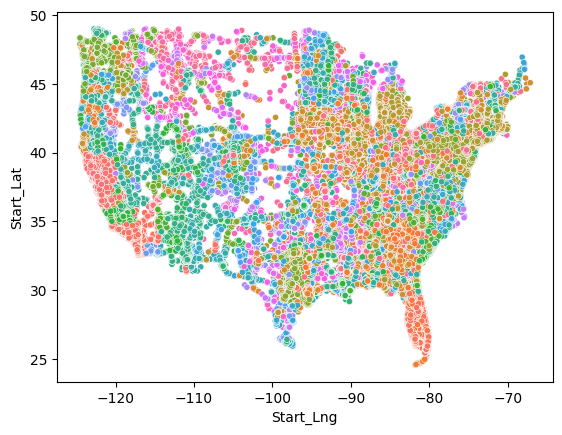

In [25]:
# Map of accidents, color code by county

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='County', legend=False, s=20)
plt.show()

#### `-Insights of above Visualization `
    - High Accident Regions: You can visually identify counties or clusters where accidents occur frequently.
    - Regions where points are tightly packed or overlapping indicate areas with higher accident density.

In [26]:
df.columns

Index(['Source', 'Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'City',
       'County', 'State', 'Timezone', 'Airport_Code', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Start_Time_Year', 'Start_Time_Month',
       'End_Time_Year', 'End_Time_Month', 'Weather_Timestamp_Year',
       'Weather_Timestamp_Month'],
      dtype='object')

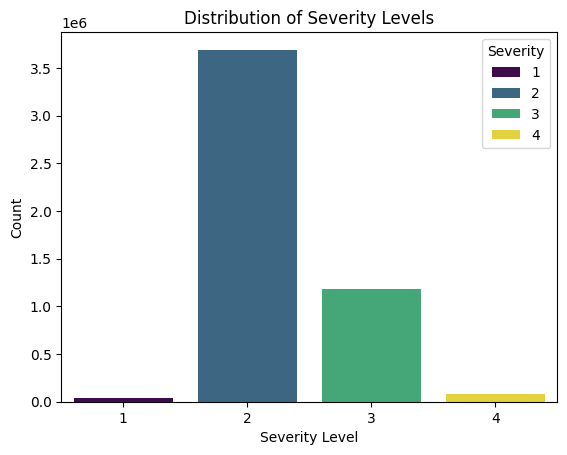

In [27]:
# 1. Severity Distribution

sns.countplot(x='Severity', data=df, hue='Severity', palette='viridis')
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

#### `-Insights of above visualization`
    - The dataset is highly imbalanced in terms of severity levels.
    - Severity 2 forms the majority of cases.
    - Severity 1 and 4 are rare, likely representing minor incidents and extreme accidents, respectively.


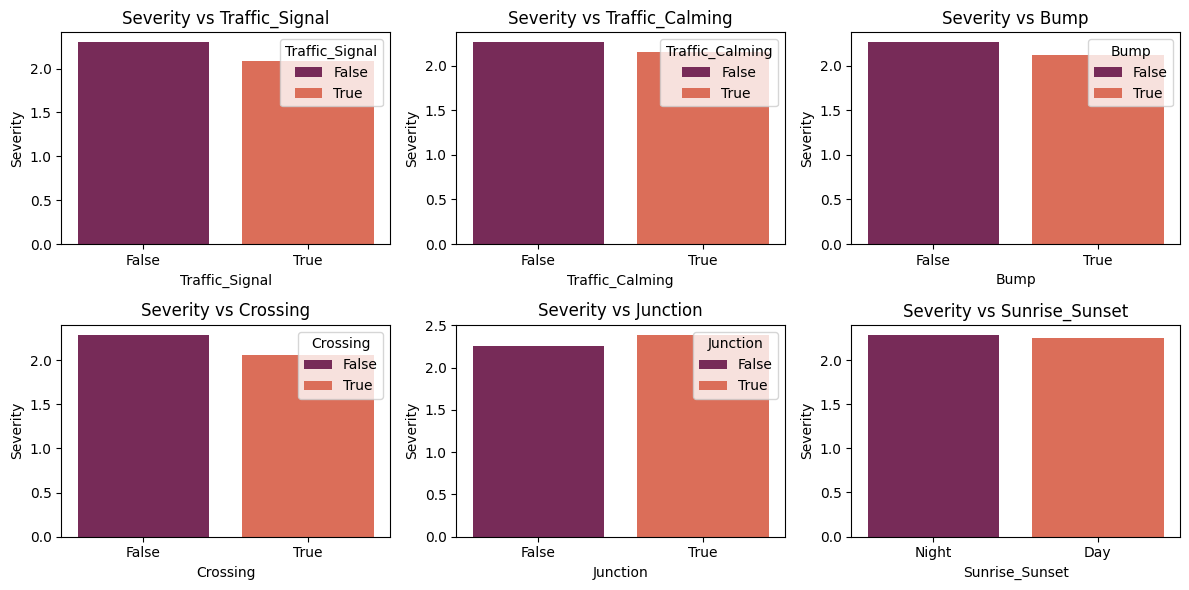

In [28]:
# 2.Severity and Categorical Features

binary_features = ['Traffic_Signal', 'Traffic_Calming', 'Bump', 'Crossing', 'Junction', 'Sunrise_Sunset']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(binary_features):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=feature, y='Severity', data=df, palette='rocket', hue = feature, errorbar=None)
    plt.title(f'Severity vs {feature}')
plt.tight_layout()
plt.show()


In [29]:
# 4.Geospatial Visualization

import folium
from folium.plugins import HeatMap

# Create a base map
map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=10)

# Heatmap layer
heat_data = df[['Start_Lat', 'Start_Lng', 'Severity']].values.tolist()
HeatMap(heat_data, max_value=4, radius=8).add_to(accident_map)

accident_map.save('accident_heatmap.html')  # Saves an HTML map


#### Above Visualization is a World Map Visual created as HTML file, which shows Seveirty level according to the lattitude.
    `-Bright Green/Yellow Areas: Indicate high-density regions with a large number of accidents. These are typically urban centers or heavily trafficked highways.
    
    `-Blue Areas: Show medium to low accident density, often found in suburban regions or smaller cities.
    
    `-Dark Blue/Faint Areas: Represent very low-density regions, usually rural areas or sparsely populated zones.

### Splitting, Scalling and Encoding


#### `-Splitting the data into a trager datafrome and features dataframe`

In [24]:
X = df.drop(columns = ['Severity'] , axis = 1)
y = df['Severity']

#### `-Performing OneHotEncoding on the dataset to handle categorical data`

In [25]:
from sklearn.preprocessing import OneHotEncoder
columns = ['State', 'Timezone', 'Wind_Direction', 'Weather_Condition', 'Source', 'Sunrise_Sunset', 'Nautical_Twilight', 'Astronomical_Twilight']
encoder = OneHotEncoder(sparse_output = False, drop = 'first')

X = encoder.fit_transform(X[['State', 'Timezone', 'Wind_Direction', 'Weather_Condition', 'Source', 'Sunrise_Sunset', 'Nautical_Twilight', 'Astronomical_Twilight']])


### `- Splitting the data into 75% Train set, 15% Validation set and 10% Test set`

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.25, random_state = 35)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.4, random_state = 35)

### `Scaling the numerical columns after onehotencoding `

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)


# MODEL BUILDING

In [31]:
# List of classification algorithms
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

In [29]:
from sklearn.metrics import accuracy_score

In [29]:
from sklearn.linear_model import LogisticRegression
# Logistic regression
lr = LogisticRegression(random_state=0, max_iter = 1000, C = 0.1)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.2f}.".format(acc))

[Logistic regression algorithm] accuracy_score: 0.75.


## Above Model shows-

A Logistic Regression model is trained with C=0.1 (regularization strength) and 1000 iterations, then tested on unseen data.

The model achieves a 75% accuracy score, showing reasonable predictive performance.
    
Results indicate a balanced fit for the data, suitable for binary or multiclass classification.

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

acc=accuracy_score(y_test, y_pred)

accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.2f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.2f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.74.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.74.


## KNN models shows-

A K-Nearest Neighbors (KNN) classifier with 6 neighbors is trained to predict labels based on the majority vote of its nearest neighbors in the feature space.
    
The model achieves an accuracy score of 74%, indicating its ability to classify with reasonable correctness.
    
The identical knn.score and accuracy_score (both 0.74) validate the model's consistent performance on the test data.

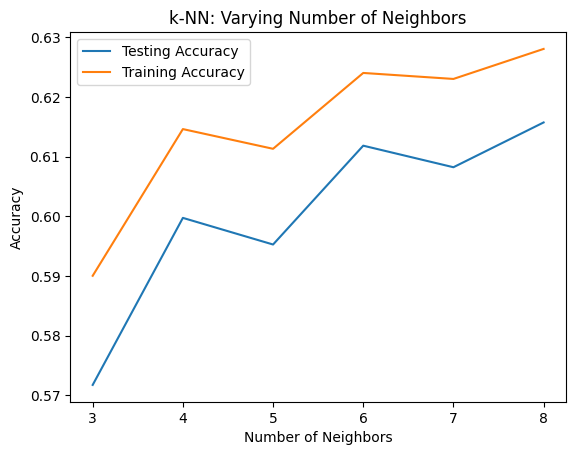

In [36]:
neighbors = np.arange(3, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, n_neighbor in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)

    knn.fit(X_train,y_train)

    train_accuracy[i] = knn.score(X_train, y_train)

    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [32]:
# Decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

dt_entropy.fit(X_train, y_train)

y_pred= dt_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred)

print('[Decision Tree -- entropy] accuracy_score: {:.2f}.'.format(accuracy_entropy))

# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

dt_gini.fit(X_train, y_train)

y_pred= dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred)

acc=accuracy_gini
accuracy_lst.append(acc)

print('[Decision Tree -- gini] accuracy_score: {:.2f}.'.format(accuracy_gini))


[Decision Tree -- entropy] accuracy_score: 0.75.
[Decision Tree -- gini] accuracy_score: 0.75.


In [33]:
# Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

acc=accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)

print("[Randon forest algorithm] accuracy_score: {:.2f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.75.


# CONCLUSION
Based on the comparison:

    Logistic Regression and Random Forest demonstrated the best performance with 75% accuracy, making them ideal choices for this classification task.

    Further model tuning or additional feature engineering might improve overall accuracy.

    The KNN and Decision Tree models, while reasonably accurate, were outperformed by the ensemble and regression-based methods.